## Generative Models
* naive bayes: BernoulliNB, GaussianNB, MultinomialNB
* GMM: GaussianMixture
* Introduce GridSearchCV, accuracy_score
* Fisher Discriminant Analysis (FDA)

In [106]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the wine dataset
data = pd.read_csv('data/wine_original.csv')
labels = data['class']
labels -= 1
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=10)

In [107]:
print(y_train.value_counts())
print (X_train.shape)
X_train.head()

1    53
0    49
2    40
Name: class, dtype: int64
(142, 13)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [108]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()
# Train the classifier
gnb.fit(X_train, y_train)
# Make predictions on test data
y_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)

# print the accuracy
print ('Training accuracy = ' + str(np.sum(y_train_pred == y_train)/len(y_train)))
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

Training accuracy = 0.985915492958
Test accuracy = 0.888888888889


### GridSearchCV and accuracy_score using Multinomial Naive Bayes

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

parameters = { 'alpha' : [0, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 100] }
mnb = MultinomialNB()
clf = GridSearchCV(mnb, parameters, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#accuracy = np.sum(y_pred == y_test)/len(y_test)
accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_train), y_train)
print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Train accuracy = ' + str(train_acc)) 
print (clf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Test accuracy = 0.833333333333
Train accuracy = 0.852112676056
{'alpha': 0}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.2s finished


### Gaussian Mixture

In [110]:
import matplotlib as mpl
colors = ['navy', 'turquoise', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

import matplotlib.pyplot as plt
def plot_classification(ax, estimator, title, xfeature, yfeature, X_train, X_test):
    x_min, x_max = X_train[xfeature].min() - 1, X_train[xfeature].max() + 1
    y_min, y_max = X_train[yfeature].min() - 1, X_train[yfeature].max() + 1
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_xlabel(xfeature, fontsize=10)
    ax.set_ylabel(yfeature, fontsize=10)
    make_ellipses(estimator, ax)

    # Plot train data with dots
    for n, color in enumerate(colors):
        train_data = X_train[y_train == n]
        ax.scatter(train_data[xfeature], train_data[yfeature], s=10, color=color)

    # Plot the test data with crosses
    for n, color in enumerate(colors):
        test_data = X_test[y_test == n]
        ax.scatter(test_data[xfeature], test_data[yfeature], marker='x', color=color)

    ax.set_title(title, fontsize=10)

def plot_boundary(ax, estimator, title, xfeature, yfeature, X_train, X_test):
    from matplotlib.colors import ListedColormap
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X_train[xfeature].min() - 1, X_train[xfeature].max() + 1
    y_min, y_max = X_train[yfeature].min() - 1, X_train[yfeature].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .008),
                        np.arange(y_min, y_max, .008))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(X_train[xfeature], X_train[yfeature], c=y_train, cmap=cmap_bold)
    ax.scatter(X_test[xfeature], X_test[yfeature], c=y_test, marker='x', cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(xfeature, fontsize=10)
    ax.set_ylabel(yfeature, fontsize=10)
    ax.set_title(title, fontsize=10)

GMM covariances:
[[[ 0.21193334  0.00804302]
  [ 0.00804302  0.01549938]]

 [[ 0.19364771 -0.02156942]
  [-0.02156942  0.04801611]]

 [[ 0.35643077 -0.01636263]
  [-0.01636263  0.00713873]]]
Train accuracy = 0.915492957746
Test accuracy = 0.805555555556


GMM covariances:
[[ 0.17118458 -0.00579269]
 [-0.00579269  0.0426741 ]]
Train accuracy = 0.823943661972
Test accuracy = 0.777777777778


GMM covariances:
[[ 0.21066261  0.01491501]
 [ 0.18943897  0.04637229]
 [ 0.29472902  0.00685079]]
Train accuracy = 0.908450704225
Test accuracy = 0.777777777778


GMM covariances:
[ 0.07863619  0.09428019  0.06594552]
Train accuracy = 0.725352112676
Test accuracy = 0.694444444444




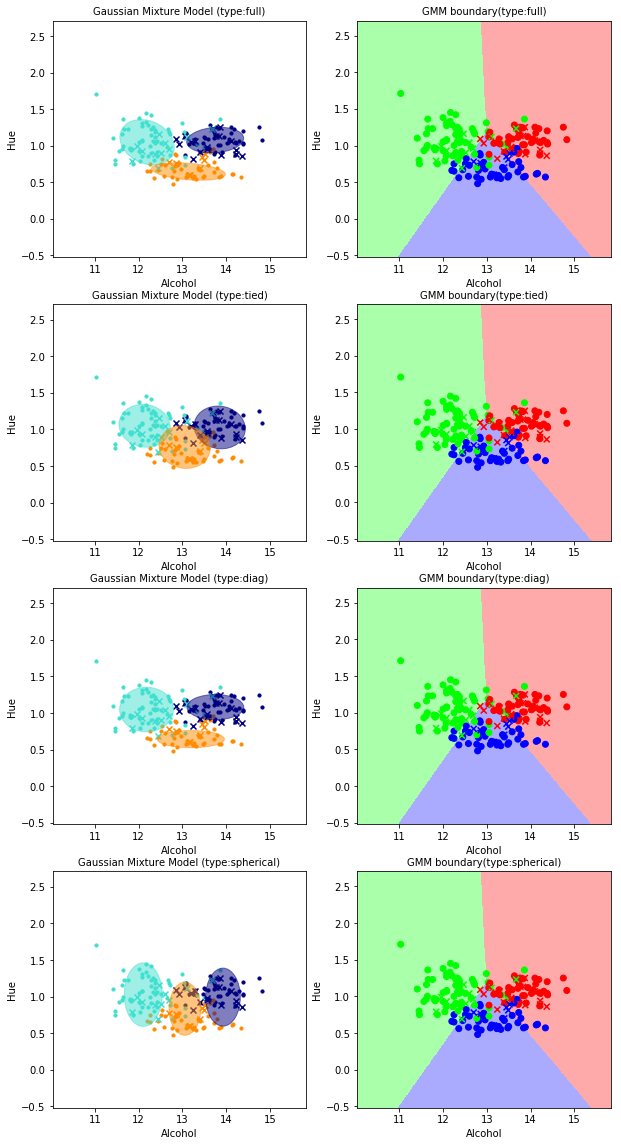

In [111]:
# covariance_type
# 'full' (each component has its own general covariance matrix),
#'tied' (all components share the same general covariance matrix),
#'diag' (each component has its own diagonal covariance matrix),
#'spherical' (each component has its own single variance).
from sklearn.mixture import GaussianMixture

xfeature, yfeature = 'Alcohol', 'Hue'
X_train, X_test, y_train, y_test = train_test_split(data[[xfeature, yfeature]], labels, test_size=0.2, random_state=5)

fig, ax = plt.subplots(4, 2)
fig.set_size_inches(10, 20)

components = len(y_train.value_counts())
for i,cov_type in enumerate(['full','tied','diag','spherical']):
    clf = GaussianMixture(n_components=components, covariance_type=cov_type, max_iter=20, random_state=0)  
    clf.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(components)])
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred = clf.predict(X_test)

    print("GMM covariances:\n{}".format(clf.covariances_))
    print('Train accuracy = ' + str(accuracy_score(y_train, pred_train)))
    print('Test accuracy = ' + str(accuracy_score(y_test, pred)))
    print("\n")
    plot_classification(ax[i,0], clf, 'Gaussian Mixture Model (type:{})'.format(cov_type), xfeature, yfeature, X_train, X_test)
    plot_boundary(ax[i,1], estimator, 'GMM boundary(type:{})'.format(cov_type), xfeature, yfeature, X_train, X_test)
plt.show()

### Fisher Discriminant Analysis 

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print('Training accuracy = ' + str(np.sum(y_train_pred == y_train)/len(y_train)))
print('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))
print("weight vector:\n{}".format(clf.coef_))

Training accuracy = 1.0
Test accuracy = 0.944444444444
weight vector:
[[  3.46423061e+00  -5.53514236e-01   4.06791897e+00  -8.37932651e-01
    7.22334160e-03  -2.02884437e+00   5.56766611e+00   1.08117032e+00
   -1.23185391e+00  -1.17422137e+00  -1.61517893e+00   3.56601382e+00
    1.81106026e-02]
 [ -1.80191142e+00  -6.30080891e-01  -4.77893044e+00   2.98979233e-01
    8.95227517e-03  -3.99909545e-01   1.65805074e+00   4.15027563e+00
    5.96339693e-01  -7.27551511e-01   3.51351648e+00  -1.28752249e-01
   -7.02187498e-03]
 [ -9.34575015e-01   1.52631128e+00   2.89708074e+00   4.31360434e-01
   -2.10129214e-02   2.73015091e+00  -8.33312553e+00  -7.36064228e+00
    3.98937069e-01   2.32425971e+00  -3.57433683e+00  -3.55118614e+00
   -8.48332026e-03]]


In [113]:
def plot_scatter(ax, title, xfeature, yfeature, X_train, X_test):
    ax.set_xlabel(xfeature, fontsize=10)
    ax.set_ylabel(yfeature, fontsize=10)

    # Plot train data with dots
    for n, color in enumerate(colors):
        train_data = X_train[y_train == n] if type(xfeature) is str else X_train[(y_train == n).values]
        x = train_data[xfeature] if type(xfeature) is str else train_data[:,xfeature]
        y = train_data[yfeature] if type(yfeature) is str else train_data[:,yfeature]
        ax.scatter(x, y, s=10, color=color)

    # Plot the test data with crosses
    for n, color in enumerate(colors):
        test_data = X_test[y_test == n] if type(xfeature) is str else X_test[(y_test == n).values] 
        x = test_data[xfeature] if type(xfeature) is str else test_data[:,xfeature]
        y = test_data[yfeature] if type(yfeature) is str else test_data[:,yfeature]
        ax.scatter(x, y, marker='x', color=color)

    ax.set_title(title, fontsize=10)


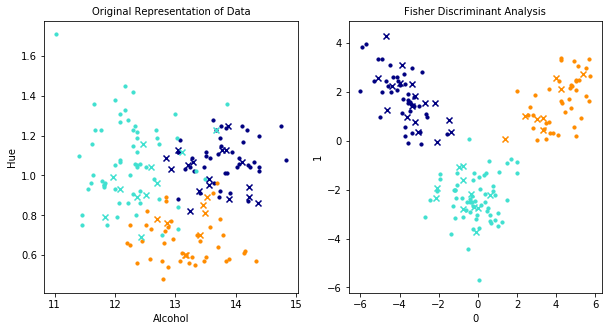

In [114]:
n_classes = len(np.unique(y_train))
clf = LinearDiscriminantAnalysis(n_components=2)
X_transform = clf.fit(X_train, y_train).transform(X_train)
X_test_transform = clf.transform(X_test)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 5)
plot_scatter(ax[0], 'Original Representation of Data', 'Alcohol', 'Hue', X_train, X_test)
plot_scatter(ax[1], 'Fisher Discriminant Analysis', 0, 1, X_transform, X_test_transform)

plt.show()

Test accuracy = 0.777777777778
weight vector:
[[  3.1572291    4.95655886]
 [ -2.629454     4.17246078]
 [  0.62909045 -11.46307798]]


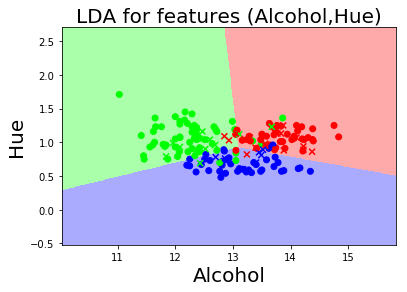

In [115]:
# Only 2 features and decision boundaries.

from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Hue'].min() - 1, X_train['Hue'].max() + 1

h = .008  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

y_pred = clf.predict(X_test)
print('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))
print('weight vector:\n{}'.format(clf.coef_))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train['Alcohol'], X_train['Hue'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Hue'], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Hue', fontsize=20)
plt.title("LDA for features (Alcohol,Hue)", fontsize=20)

plt.show()